**I analyzed the relationships between the inputs in the data and the unit area price of the house.**

**with Multiple Linear Regression**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Real_estate_valuation_data_set.csv",index_col=0)

In [4]:
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6


In [5]:
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 1 to 414
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 25.9 KB


In [26]:
cols = ['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']
X = pd.DataFrame(df,columns=cols)

y = pd.DataFrame(df,columns = ["Y house price of unit area"])

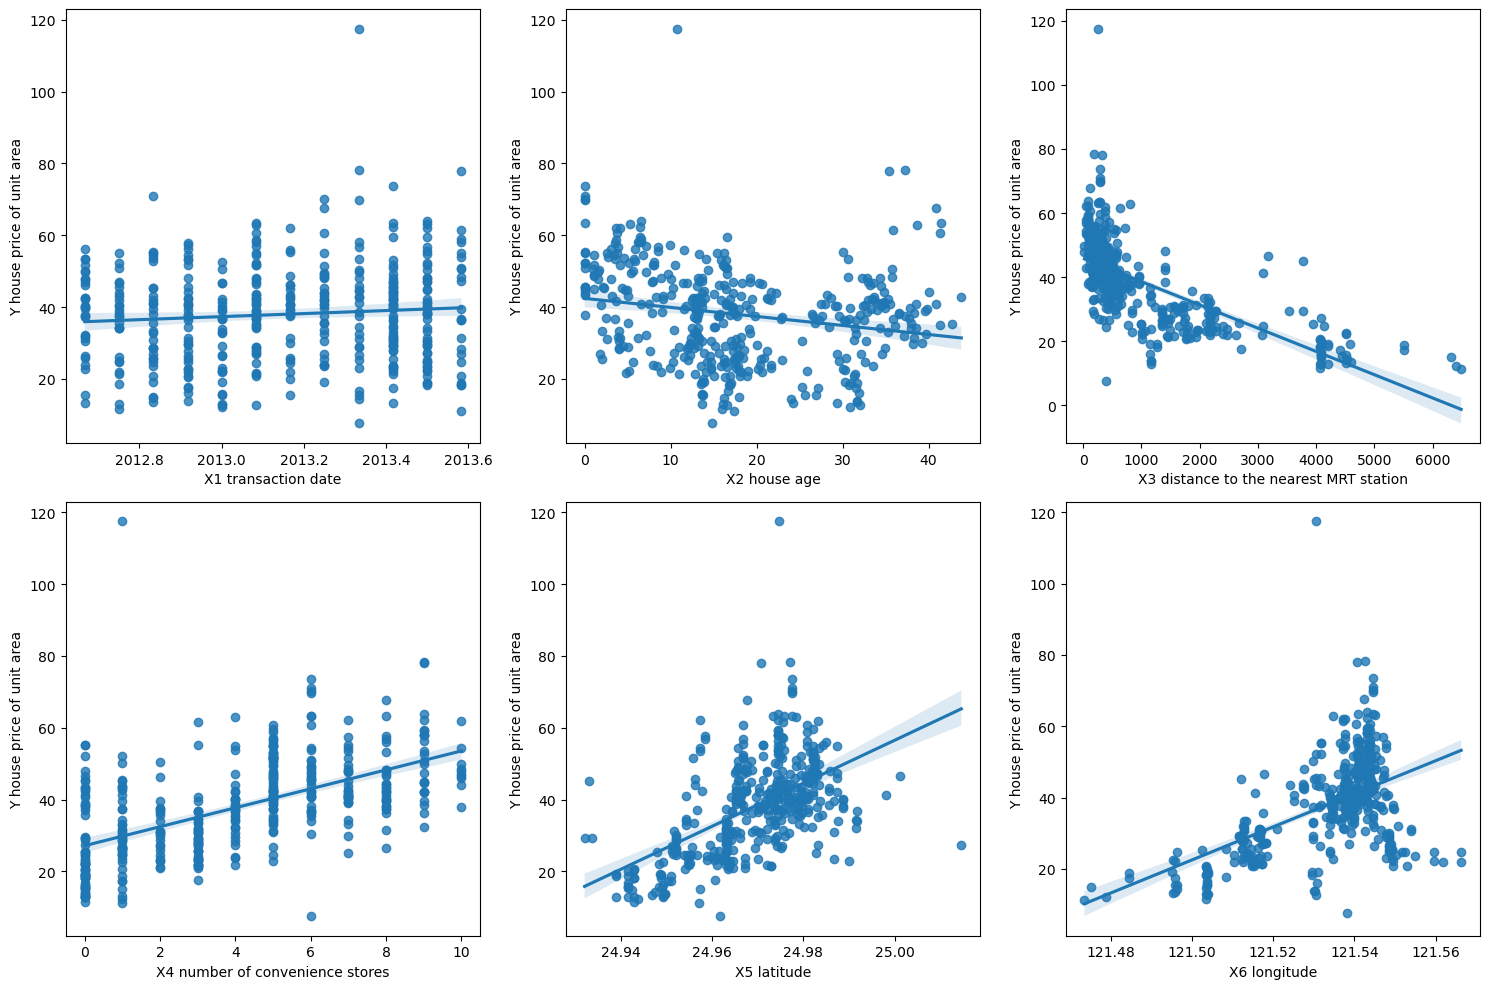

In [31]:
plt.figure(figsize = (15,10))

for i in range(len(cols)):
    plt.subplot(2,3,i+1)
    sns.regplot(x = X[cols[i]], y = y)
plt.tight_layout()    

**I decided that transaction date and house age didn't affect the price much so I deleted their data.**

In [32]:
X.drop(["X1 transaction date","X2 house age"],axis = 1,inplace=True)

In [33]:
X

,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
No,,,,
1,84.87882,10,24.98298,121.54024
2,306.59470,9,24.98034,121.53951
3,561.98450,5,24.98746,121.54391
4,561.98450,5,24.98746,121.54391
5,390.56840,5,24.97937,121.54245
...,...,...,...,...
410,4082.01500,0,24.94155,121.50381
411,90.45606,9,24.97433,121.54310
412,390.96960,7,24.97923,121.53986


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [40]:
cols_num =  ['X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']
X_train[cols_num] = scaler.fit_transform(X_train[cols_num])

In [47]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [48]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [49]:
X_train_model = sm.add_constant(X_train)

In [50]:
ols = sm.OLS(y_train,X_train_model).fit()

In [51]:
print(ols.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.491
Model:                                    OLS   Adj. R-squared:                  0.484
Method:                         Least Squares   F-statistic:                     68.41
Date:                        Sun, 12 Mar 2023   Prob (F-statistic):           1.73e-40
Time:                                20:24:32   Log-Likelihood:                -1080.7
No. Observations:                         289   AIC:                             2171.
Df Residuals:                             284   BIC:                             2190.
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

**I deleted according to p value, because p > 0.05**

In [52]:
X_train.drop(["X6 longitude"],axis = 1,inplace=True)

In [56]:
X_train_model = sm.add_constant(X_train)
new_ols = sm.OLS(y_train,X_train_model).fit()

In [57]:
print(new_ols.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.491
Model:                                    OLS   Adj. R-squared:                  0.485
Method:                         Least Squares   F-statistic:                     91.52
Date:                        Sun, 12 Mar 2023   Prob (F-statistic):           1.67e-41
Time:                                20:30:54   Log-Likelihood:                -1080.8
No. Observations:                         289   AIC:                             2170.
Df Residuals:                             285   BIC:                             2184.
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

**RESULTS**

**1- The variable that effects the price the most is "distance to the nearest MRT station"**

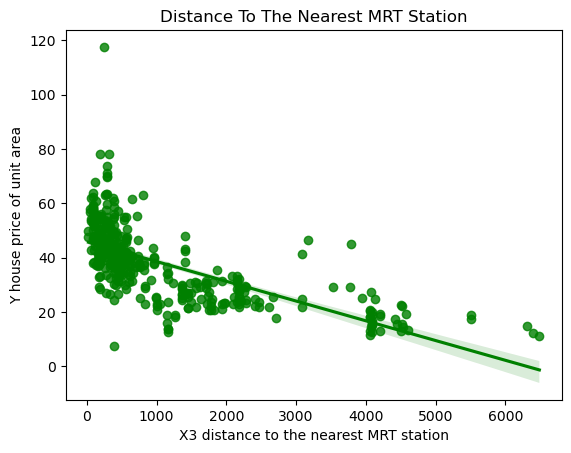

In [62]:
plt.title("Distance To The Nearest MRT Station")
sns.regplot(x = X["X3 distance to the nearest MRT station"], y = y,color = "green")
plt.show()

**2- The second most effecting variable is "latitude"**

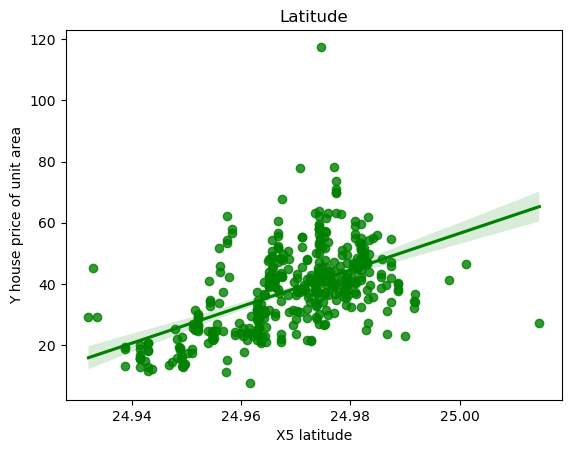

In [64]:
plt.title("Latitude")
sns.regplot(x = X["X5 latitude"], y = y,color = "green")
plt.show()

**3- The third most effecting variable is "number of convenience stores"**

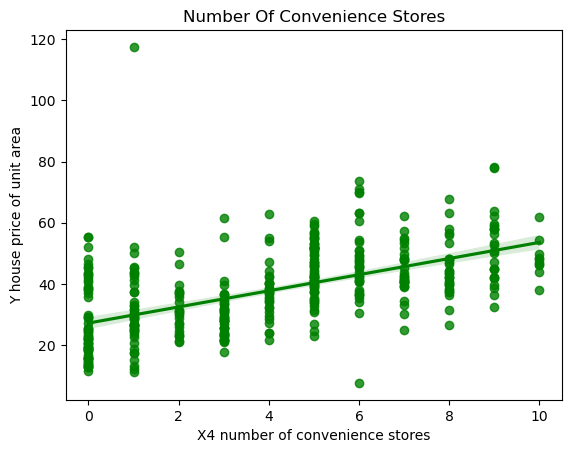

In [66]:
plt.title("Number Of Convenience Stores")
sns.regplot(x = X["X4 number of convenience stores"], y = y,color = "green")
plt.show()